In [1]:
import json
import base64
from PIL import Image
from rag_search.vector_db import VectorDatabase

c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#### LOAD API KEYS
with open("../keys/huggingface_key.txt","r") as f:
    huggingface_key = f.read()

with open("../keys/mvp_projects_key.txt","r") as f:
    openai_key = f.read()

In [ ]:
#### INITIATE VECTOR CLASS
vec = VectorDatabase(
    text_embedding_model = "local-bge-base-en",
    image_embedding_model = "local-clip-vit-base-patch32",
    response_model = "local-mistral-3",
    captioning_model = "local-blip-2",
    huggingface_key = huggingface_key,
    save_dir = "custom_db_path" # assign to default save directory
    )

Loading BGE embedder
Loading CLIP base embedder


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading BLIP captioning model


In [4]:
#### VECTORIZE ALL FILES IN FOLDER
vec.vectorize_folder(folder_path = 'rag_search/data')

PDF detected
Processing Doc: rag_search\data\contrary_research_hebbia.pdf
Captioning Image: pg 0; img 4
Captioning Image: pg 0; img 9
Captioning Image: pg 0; img 10
Captioning Image: pg 0; img 11
Captioning Image: pg 0; img 12
Captioning Image: pg 1; img 25
Captioning Image: pg 1; img 26
Captioning Image: pg 1; img 27
Captioning Image: pg 2; img 35
Captioning Image: pg 2; img 25
Captioning Image: pg 2; img 36
Captioning Image: pg 2; img 37
Captioning Image: pg 3; img 25
Captioning Image: pg 3; img 51
Captioning Image: pg 3; img 52
Captioning Image: pg 4; img 25
Captioning Image: pg 4; img 26
Captioning Image: pg 4; img 62
Captioning Image: pg 5; img 67
Captioning Image: pg 5; img 25
Captioning Image: pg 5; img 26
Captioning Image: pg 5; img 62
Captioning Image: pg 6; img 76
Captioning Image: pg 6; img 25
Captioning Image: pg 6; img 26
Captioning Image: pg 6; img 62
Captioning Image: pg 7; img 84
Captioning Image: pg 7; img 25
Captioning Image: pg 7; img 87
Captioning Image: pg 7; img 8

In [5]:
#### SEARCH FOR RESPONSE - SPECIFIC FILE
query = {
    "text": "How has Hebbia's revenue grown in recent years?"
    }
search_file = "rag_search/data/hebbia_sacra_report.pdf"
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

Searching only in specified file: rag_search/data/hebbia_sacra_report.pdf
Commencing search of databse
Top Similarity Scores: [0.896122  0.896122  0.896122  0.8815303 0.8815303]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:590: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Top Similarity Scores: [0.4008376 0.4008376 0.4008376 0.2388543 0.2388543]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "Hebbia has experienced significant revenue growth recently. In 2022, their annualized recurring revenue (ARR) was $0.47 million. By 2023, this increased to $10 million, representing a growth rate of 2,046%. This growth has been driven by new customer acquisition and expanded usage within existing accounts. However, it's noted that some of this revenue may come from pilot contracts, as many financial institutions are still in the early stages of adopting AI tools.",
  "sources": [
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num": 2,
      "content_type": "text_chunk",
      "content_id": "8",
      "content_raw": "Hebbia's recent growth appears driven by both new customer acquisition\nand expanding usage within existing accounts. However, some of this\nrevenue may represent pilot contracts rather than committed long-term\nusage, as many financial institutions are still in early stages of AI tool\nadoption."
    },
    {
      "doc_na

In [6]:
#### SEARCH FOR RESPONSE - SPECIFIC FOLDER
query = {
    "text": "What is the company's primary ICP?"
    }
search_file = "rag_search/data"
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

Searching files in specified folder: rag_search/data
Commencing search of databse
Top Similarity Scores: [0.7974603  0.77273786 0.7708075  0.7708075  0.7708075 ]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:590: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Top Similarity Scores: [0.2905841  0.25174278 0.25143936 0.25079373 0.24811727]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "The company's primary ICP (Ideal Customer Profile) is likely aligned with the use cases mentioned in the material. Hebbia appears to focus on providing solutions for:\n\n1. **Credit Agreement/Legal Contract Review**: Extracting and comparing key terms across agreements.\n2. **Investment Comparative Analysis (IC Memo)**: Identifying key risks, opportunities, and performance indicators.\n3. **Expert Call Review**: Extracting insights and common themes from expert calls.\n4. **Public Data Search**: Analyzing company performance and management commentary from various data sources.\n\nThese use cases suggest that their ideal customers are likely businesses, particularly those involved in investment, legal, and data-intensive industries.",
  "sources": [
    {
      "doc_name": "rag_search\\data\\contrary_research_hebbia.pdf",
      "page_num": 0,
      "content_type": "image_caption",
      "content_id": "4",
      "content_raw": "the logo of the company"
    },
    {
     

In [5]:
#### SEARCH FOR RESPONSE - WHOLE DATABASE
query = {
    "text": "What is their business model?"
    }
search_file = None
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

No specific search granularity provided - searching full database
Commencing search of databse
Top Similarity Scores: [0.57084651 0.40793722 0.38562224 0.3562118  0.35485035]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Top Similarity Scores: [0.2627391  0.25884342 0.2576823  0.2574909  0.2562234 ]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:548: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "Hebbia's business model primarily revolves around generating revenue through enterprise software subscriptions. Their pricing is comparable to annual Bloomberg Terminal subscriptions. The company targets high-value enterprise accounts, especially in financial services, working with 33% of the top global asset managers by Assets Under Management (AUM). Hebbia leverages each search query and interaction to refine its models, enhancing organizational context and user intent understanding. This data-driven approach underpins their expansion strategy, supported by significant capital raises, like their $80 million Series B valuation.",
  "sources": [
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num": 2,
      "content_type": "text_chunk",
      "content_id": "2",
      "content_raw": "Business Model"
    },
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num": 1,
      "content_type": "text_chunk",
      "

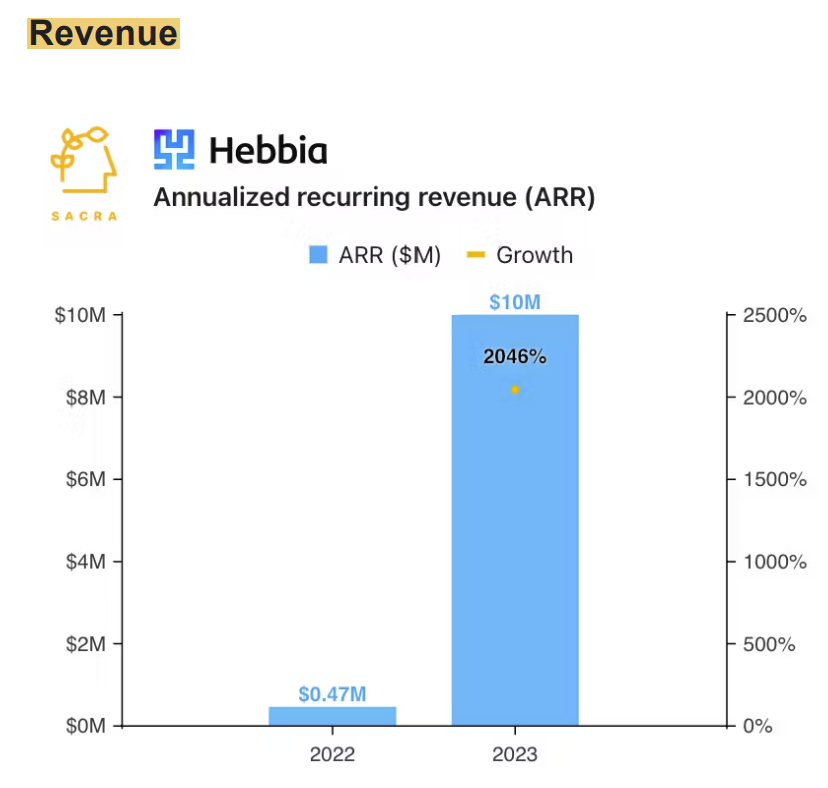

In [9]:
img = Image.open("./example_graph_1.png")
img

In [12]:
#### SEARCH FOR IMAGE
with open("./example_graph_1.png", "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    
query = {
    "text": "What drove this trend?",
    "image": [base64_image]
    }
search_file = "rag_search/data/hebbia_sacra_report.pdf"
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

Searching only in specified file: rag_search/data/hebbia_sacra_report.pdf
Commencing search of databse
Top Similarity Scores: [0.25347902 0.23942581 0.23902113 0.23531217 0.2337974 ]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Top Similarity Scores: [0.22712976 0.20862055 0.20054723 0.1992208 ]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:548: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


Top Similarity Scores: [0.872886   0.52555263 0.45391196 0.35101125]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:566: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_image_references['search_reference'] = img


{
  "response": "Hebbia's significant revenue growth, increasing from $0.47M in 2022 to $10M in 2023 (a 2046% increase), was driven primarily by the adoption of AI tools in financial institutions. Their traction in private equity due diligence, with 90% market penetration among top PE firms, indicates a strong product-market fit. However, much of this growth may be attributed to pilot contracts rather than long-term commitments, making it potentially vulnerable.\n\nThe company's early success came from enabling non-technical users to analyze large document sets. However, advances in large language models (LLMs) and offerings like Azure's ChatGPT playground and Databricks are challenging this differentiator. Additionally, as document analysis capabilities potentially become commoditized, Hebbia's high pricing may face pressure. The industry landscape is competitive, with enterprise-focused companies like Glean and Moveworks, incumbents like SharePoint and Elasticsearch, and knowledge ma

# Next Steps
1. Multi-threaded API requests to improve embedding speed
2. Leveraging document hashes to avoid re-embedding existing files & append new files to existing database
3. App front end
4. Auto-execution when file added
5. Image to text search
6. Subsequent deep-dive / sub questions
7. Improved agentic flow - e.g. generate domain-specific sub-questions for an overarching prompt
8. Improved display
9. Improve robustness of local model execution